# Fitting a normal curve using MLE

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

Let's first read in the data and take a look at it.

In [71]:
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [129]:
df['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

Let's filter for oranges and take a look at the statistics for these oranges.

In [109]:
orange_weights = df[df['name'] == 'orange']['weight']
orange_weights.describe()

count    5000.000000
mean      152.804920
std        18.669021
min        86.760000
25%       140.147500
50%       152.665000
75%       165.430000
max       231.090000
Name: weight, dtype: float64

Let's use scipy to fit a normal curve to the data as a whole and matplotlib to plot this against the actual data.

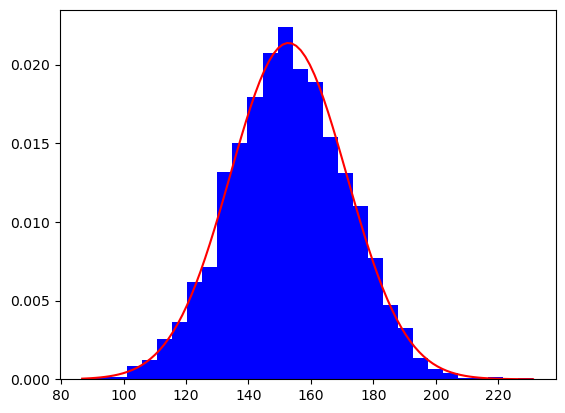

In [120]:
plt.hist(orange_weights, bins=30, density=True, color='b')
mean, std_dev = stats.norm.fit(orange_weights)
xmin, xmax = min(orange_weights), max(orange_weights)
x = np.linspace(xmin, xmax, 100)
pdf_fitted = stats.norm.pdf(x, loc = mean, scale = std_dev)
plt.plot(x, pdf_fitted, color = 'r')
plt.show()

Now let's see how MLE performs on a sample of 50 oranges.

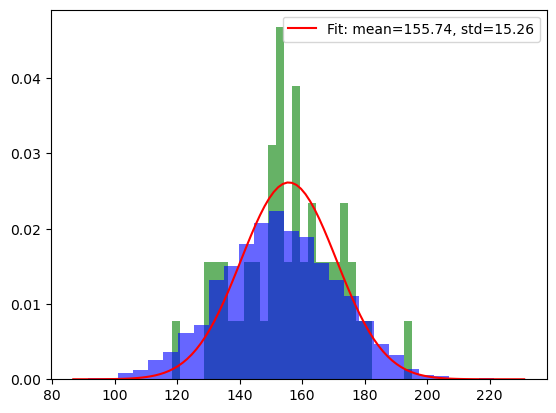

In [130]:
sample = orange_weights.sample(50)
mean, std_dev = stats.norm.fit(sample)


plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')
plt.hist(orange_weights, bins=30, density=True, alpha=0.6, color='b')

# Plot the fitted normal distribution
xmin, xmax = min(orange_weights), max(orange_weights)
x = np.linspace(xmin, xmax, 100)
pdf_fitted = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf_fitted, color = 'r', label=f'Fit: mean={mean:.2f}, std={std_dev:.2f}')
plt.legend()
plt.show()

Let's also get the log-likelihood of this fit.

In [128]:
mean, std_dev = stats.norm.fit(sample)
pdf_values = stats.norm.pdf(sample, loc=mean, scale=std_dev)
log_likelihood = np.sum(np.log(pdf_values))
log_likelihood

-220.1864106605016

Finally let's run four experiments of gathering 100 oranges and plot the outputs.

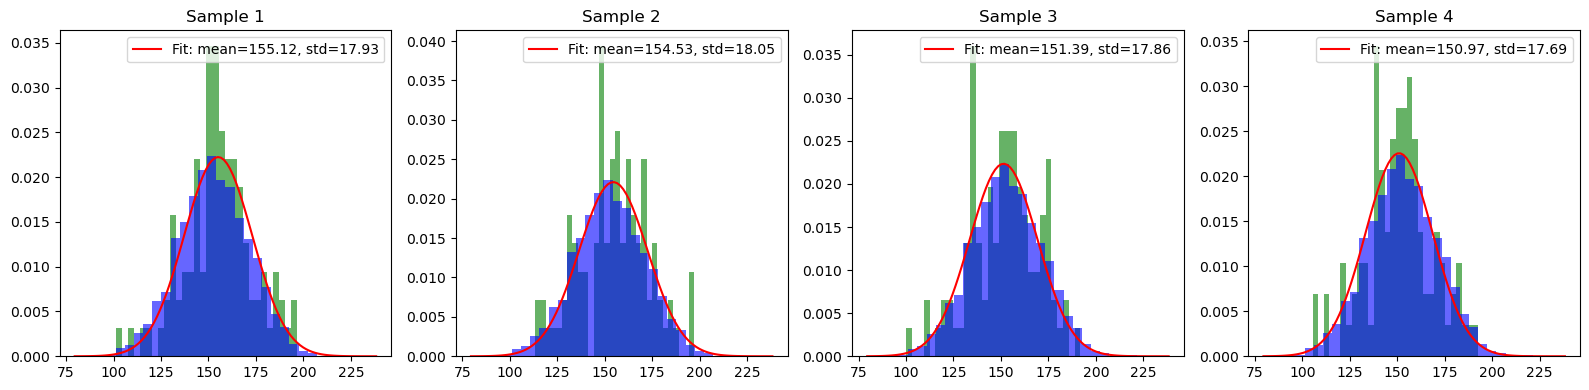

In [80]:
# Number of samples and plots
n_samples = 4
sample_size = 100

# Create a figure with 4 subplots (1 row, 4 columns)
fig, axs = plt.subplots(1, n_samples, figsize=(16, 4))  # 16x4 figure

for i in range(n_samples):
    # Take a new random sample of 100
    sample = orange_weights.sample(sample_size).values.flatten()

    # Fit a normal distribution to the sample
    mean, std_dev = stats.norm.fit(sample)

    # Plot histogram in the i-th subplot
    axs[i].hist(sample, bins=30, density=True, alpha=0.6, color='g')
    axs[i].hist(orange_weights, bins = 30, density = True, alpha = 0.6, color = 'b')
    
    # Plot the fitted normal distribution
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf_fitted = stats.norm.pdf(x, mean, std_dev)
    axs[i].plot(x, pdf_fitted, 'r-', label=f'Fit: mean={mean:.2f}, std={std_dev:.2f}')


    # Set the title and legend for the i-th subplot
    axs[i].set_title(f'Sample {i+1}')
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()